In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Load the CSV
df = pd.read_csv("moco_crime.csv", low_memory=False)

In [12]:
#Check it loaded correctly
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,...,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
0,201562627,9107,260005680,02/06/2026 09:14:28 PM,02/06/2026 09:14:00 PM,NaN,90Z,1,Crime Against Society,All Other Offenses,...,541,19700.0,NaN,ZION,NaN,RD,0.00000,0.0000,4D,"(0.0, 0.0)"
1,201562605,9105,260005659,02/06/2026 06:53:32 PM,02/06/2026 06:53:00 PM,NaN,90Z,1,Crime Against Society,All Other Offenses,...,366,2300.0,NaN,RANDOLPH,NaN,RD,39.05861,-77.0485,4D,"(39.0586, -77.0485)"
2,201562613,9021,260005661,02/06/2026 06:36:11 PM,02/06/2026 06:36:00 PM,NaN,90I,1,Crime Against Not a Crime,Runaway,...,665,17000.0,NaN,CATALPA,NaN,CT,39.13579,-77.1473,6D,"(39.1358, -77.1473)"
3,201562612,9113,260005641,02/06/2026 04:42:10 PM,02/06/2026 04:42:00 PM,NaN,90Z,1,Crime Against Society,All Other Offenses,...,392,2600.0,NaN,WINTER MORNING,NaN,WAY,39.13860,-77.0534,4D,"(39.1386, -77.0534)"
4,201562600,2303,260005645,NaN,02/06/2026 04:24:00 PM,NaN,23C,1,Crime Against Property,Shoplifting,...,186,5100.0,NaN,NICHOLSON,NaN,LA,39.04554,-77.1048,2D,"(39.0455, -77.1048)"


In [13]:
#check column names
df.columns


Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'Start_Date_Time', 'End_Date_Time', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place',
       'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [14]:
#Keep only the columns needed
columns_needed = [
    "Incident ID",
    "Start_Date_Time",
    "Crime Name1",
    "Police District Name"
]

df = df[columns_needed]

In [15]:
#check columns needed
df.head()

,Incident ID,Start_Date_Time,Crime Name1,Police District Name
0,201562627,02/06/2026 09:14:00 PM,Crime Against Society,WHEATON
1,201562605,02/06/2026 06:53:00 PM,Crime Against Society,WHEATON
2,201562613,02/06/2026 06:36:00 PM,Crime Against Not a Crime,MONTGOMERY VILLAGE
3,201562612,02/06/2026 04:42:00 PM,Crime Against Society,WHEATON
4,201562600,02/06/2026 04:24:00 PM,Crime Against Property,BETHESDA


In [19]:
# Convert start_date_time to datetime to make sure datatype
df["Start_Date_Time"] = pd.to_datetime(df["Start_Date_Time"], format="%Y-%m-%d %H:%M:%S", errors="coerce")


In [21]:
#check for bad/missing timestamps
df["Start_Date_Time"].isna().sum()


np.int64(0)

In [23]:
#Drop bad/missing timestamps
df = df.dropna(subset=["Start_Date_Time"])


In [28]:
#Filter to 2025 only
df_2025 = df[df["Start_Date_Time"].dt.year == 2025].copy()


In [29]:
#check if only 2025
df_2025["Start_Date_Time"].dt.year.value_counts()


Start_Date_Time
2025    46832
Name: count, dtype: int64

In [30]:
#Create time-based features
df_2025["hour"] = df_2025["Start_Date_Time"].dt.hour
df_2025["weekday"] = df_2025["Start_Date_Time"].dt.day_name()


In [32]:
#Check time-based features
df_2025[["Start_Date_Time", "hour", "weekday"]].head()


,Start_Date_Time,hour,weekday
3735,2025-12-31 23:51:00,23,Wednesday
3736,2025-12-31 23:49:00,23,Wednesday
3737,2025-12-31 23:44:00,23,Wednesday
3738,2025-12-31 23:40:00,23,Wednesday
3739,2025-12-31 23:30:00,23,Wednesday


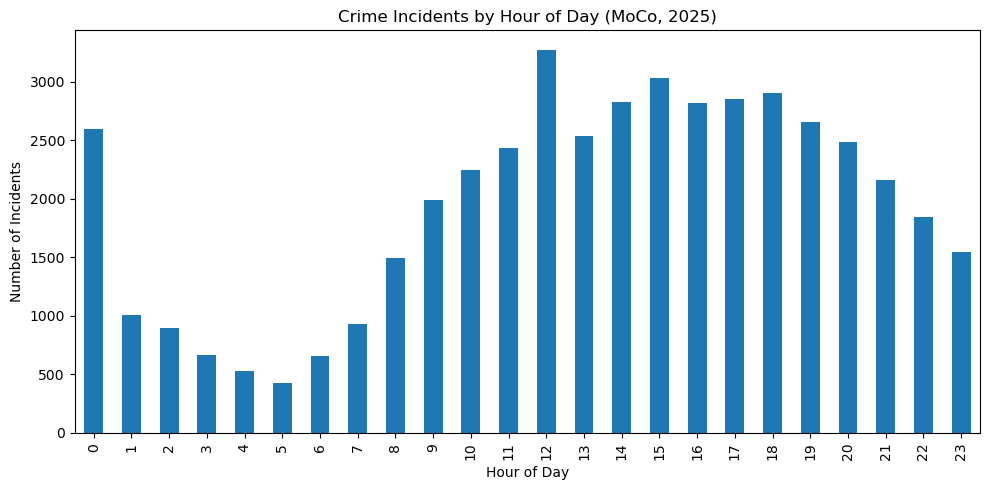

In [33]:
#Plot 1: Crimes by hour of day
hour_counts = df_2025["hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))
hour_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Incidents")
plt.title("Crime Incidents by Hour of Day (MoCo, 2025)")
plt.tight_layout()
plt.show()


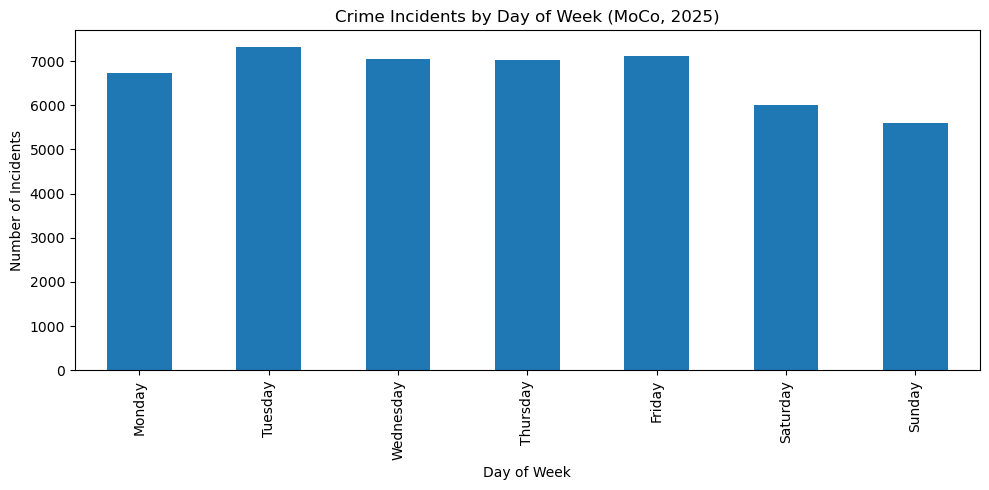

In [34]:
#Plot 2: Crimes by Weekday
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

weekday_counts = (
    df_2025["weekday"]
    .value_counts()
    .reindex(weekday_order)
)

plt.figure(figsize=(10,5))
weekday_counts.plot(kind="bar")
plt.xlabel("Day of Week")
plt.ylabel("Number of Incidents")
plt.title("Crime Incidents by Day of Week (MoCo, 2025)")
plt.tight_layout()
plt.show()


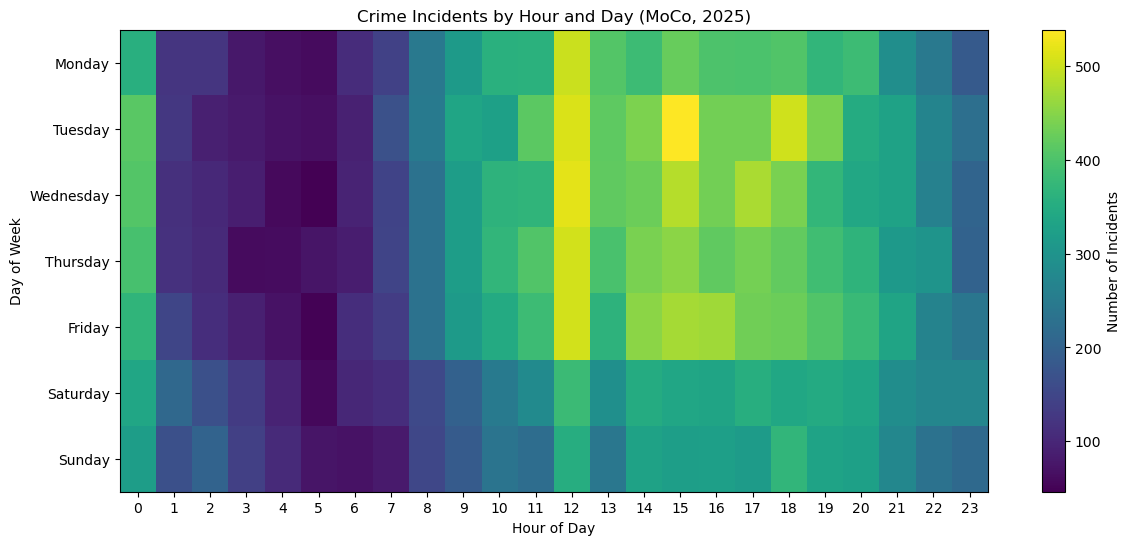

In [36]:
#Plot 3: Hour × Weekday heatmap
pivot = pd.pivot_table(
    df_2025,
    index="weekday",
    columns="hour",
    values="Incident ID",
    aggfunc="count"
).reindex(weekday_order)

plt.figure(figsize=(14,6))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Number of Incidents")
plt.xticks(range(24), range(24))
plt.yticks(range(len(weekday_order)), weekday_order)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title("Crime Incidents by Hour and Day (MoCo, 2025)")
plt.show()


In [38]:
#check categories of crime
df_2025["Crime Name1"].value_counts()


Crime Name1
Crime Against Property       23378
Crime Against Society        17503
Crime Against Person          5218
Crime Against Not a Crime      733
Name: count, dtype: int64

In [40]:
#pick top 4 categories
top_categories = df_2025["Crime Name1"].value_counts().head(4).index


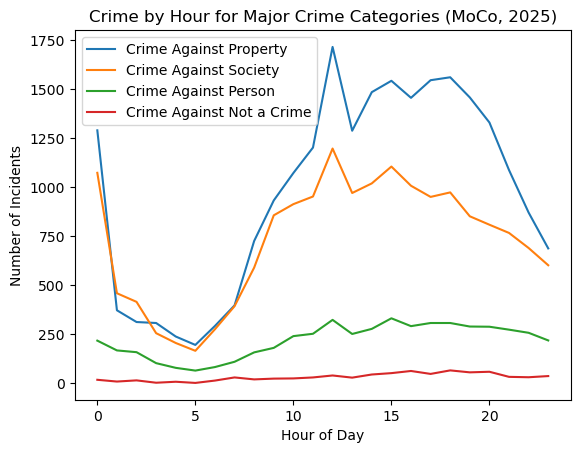

In [41]:
#Plot 4: Crime category differences
for category in top_categories:
    subset = df_2025[df_2025["Crime Name1"] == category]
    subset["hour"].value_counts().sort_index().plot(label=category)

plt.legend()
plt.xlabel("Hour of Day")
plt.ylabel("Number of Incidents")
plt.title("Crime by Hour for Major Crime Categories (MoCo, 2025)")
plt.show()


In [42]:
df_2025.to_csv("moco_crime_2025.csv", index=False)